# Exercise 2

# Data Cleaning



In [1]:
# We import the relevant libraries for the exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Load the dataset in CSV from GitHub
url = "https://raw.githubusercontent.com/ChrLawSSE/6123/refs/heads/main/Loan_Portfolio.csv"
df = pd.read_csv(url, header=1)

# Print columns to verify that we have located the correct header row
print(df.columns)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 20.4 MB/s eta 0:00:00


In [3]:
#Cropping the dataframe to remove superfluous rows

df = df.iloc[:200]  # We keep the first 200 rows of the df, since we have 200 loans to pick from for our portfolios
start_col = df.columns.get_loc("Loan Number")
# Removing the columns before "Loan Number", since we don't need them
df = df.iloc[:, start_col:]

# Checking to see if everything has gone smoothly
display(df.head())
print(df.info())

,Loan Number,Loan Amount (USD),Industry,Lending Region,Country,Loan Additionality,Climate Change Hotspot,Biodiversity Hotspot,Soil Degradation Hotspot,Water Scarcity Hotspot,...,Farmers & Employees,Female \nFarmers & Employees,Probability of Default,Expected Revenue,Expected Operating Expenses,Expected Cost of Debt,Expected Cost of Risk,Expected Net Loan Income,Unnamed: 29,Unnamed: 30
0,46.0,717’500,Coffee,Central America,Honduras,Low,Yes,Yes,Yes,No,...,1’555,354,3.20%,90’952,-16’267,-18’618,-28’019,28’047,NaN,h
1,177.0,820’000,Coffee,East Africa,"Tanzania, United Republic Of",Medium,No,No,No,No,...,5’003,2’501,1.52%,72’841,-19’215,-20’556,-6’147,26’923,NaN,NaN
2,126.0,738’000,Coffee,Central America,Guatemala,Medium,No,Yes,No,No,...,1’106,221,1.61%,61’674,-11’847,-16’000,-12’870,20’957,NaN,NaN
3,171.0,738’000,Coffee,East Africa,"Congo, The Democratic Republic Of The",Medium,No,Yes,No,No,...,6’033,1’373,3.22%,89’537,-31’063,-19’400,-21’044,18’030,NaN,NaN
4,113.0,410’000,Coffee,Central America,Nicaragua,Low,Yes,Yes,No,No,...,244,31,1.99%,47’394,-13’320,-9’528,-9’729,14’817,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Loan Number                                                                    200 non-null    float64
 1   Loan Amount (USD)                                                              200 non-null    object 
 2   Industry                                                                       200 non-null    object 
 3   Lending Region                                                                 200 non-null    object 
 4   Country                                                                        200 non-null    object 
 5   Loan Additionality                                                             200 non-null    object 
 6   Climate Change Hotspot    

In [4]:
# Converting the data in our columns into numerical data

columns_to_convert = [
    "Loan Amount (USD)",
    "Farmers & Employees",
    "Female \nFarmers & Employees",
    "Probability of Default",
    "Expected Revenue",
    "Expected Operating Expenses",
    "Expected Cost of Debt",
    "Expected Cost of Risk",
    "Expected Net Loan Income"
]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace("’", ''), errors='coerce')

# Verifying that the operation was successful
print(df[columns_to_convert].dtypes)

Loan Amount (USD)                 int64
Farmers & Employees               int64
Female \nFarmers & Employees      int64
Probability of Default          float64
Expected Revenue                  int64
Expected Operating Expenses       int64
Expected Cost of Debt             int64
Expected Cost of Risk             int64
Expected Net Loan Income          int64
dtype: object


# The Efficient Impact Frontier




In [43]:
target = int(10000000)    # The number of valid portfolios required for our simulation
batch = 50           # number of candidate portfolios to generate per batch
budget = 2500000              # Setting our investment constraint
n_loans = 200


def portfolio_generator(target, batch, n_loans, budget, loan_amounts):
# This generator only generates valid portfolios per our constraints

    collected = 0
    while collected < target:
        for _ in range(batch):
            k = np.random.randint(1, 11)
            inds = np.random.choice(n_loans, size=k, replace=False)
            candidate = np.zeros(n_loans, dtype=int)
            candidate[inds] = 1
            total_allocation = loan_amounts[candidate == 1].sum()
            if 0 < total_allocation <= budget:
                collected += 1
                yield candidate, total_allocation
                if collected >= target:
                    break

loan_amounts = df["Loan Amount (USD)"].to_numpy()
expected_net_income = df["Expected Net Loan Income"].to_numpy(dtype=float)
female_reached = df["Female \nFarmers & Employees"].to_numpy(dtype=float)


# We simulate the portfolios and store only the metrics
results = []
for candidate, total_alloc in portfolio_generator(target, batch, n_loans, budget, loan_amounts):
    # Compute the metrics for the candidate portfolio
    net_income = expected_net_income[candidate == 1].sum()
    total_female = female_reached[candidate == 1].sum()
    results.append((candidate, total_alloc, net_income, total_female))

# Converting results into a df
portfolio_df_new = pd.DataFrame({
    "Total Expected Net Loan Income": [r[2] for r in results],
    "Total Female Farmers and Employees Reached": [r[3] for r in results]
})

print(portfolio_df_new.head(30))
portfolio_df_new.info()

KeyboardInterrupt: 

In [40]:
data = {
    "Traditional": [2357500, 2887, 82573],
    "Positive": [2484600, 3642, 79961],
    "Integration": [2480500, 112352, -4984],
    "Impact": [2400550, 125428, -58731],
    "Philanthropy": [2482550, 129928, -88256],

}

df_results = pd.DataFrame(
    data,
    index=[
        "Total loans amount",
        "Total Female Farmers and Employees Reached",
        "Total Expected Net Loan Income"
    ]
)
df_results=df_results.T
display(df_results)


,Total loans amount,Total Female Farmers and Employees Reached,Total Expected Net Loan Income
Traditional,2357500,2887,82573
Positive,2484600,3642,79961
Integration,2480500,112352,-4984
Impact,2400550,125428,-58731
Philanthropy,2482550,129928,-88256


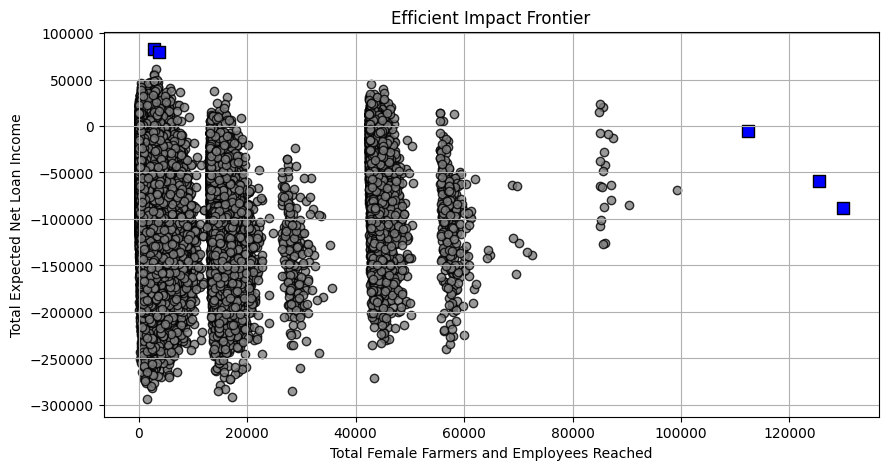

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(
    portfolio_df_new["Total Female Farmers and Employees Reached"],
    portfolio_df_new["Total Expected Net Loan Income"],
    alpha=0.8,
    edgecolor='k',
    c = 'grey'
)

plt.scatter(
    df_results["Total Female Farmers and Employees Reached"],
    df_results["Total Expected Net Loan Income"],
    c='blue',
    edgecolor='k',
    marker='s',
    s=80
)


plt.xlabel("Total Female Farmers and Employees Reached")
plt.ylabel("Total Expected Net Loan Income")
plt.title("Efficient Impact Frontier")
plt.grid(True)
plt.show()

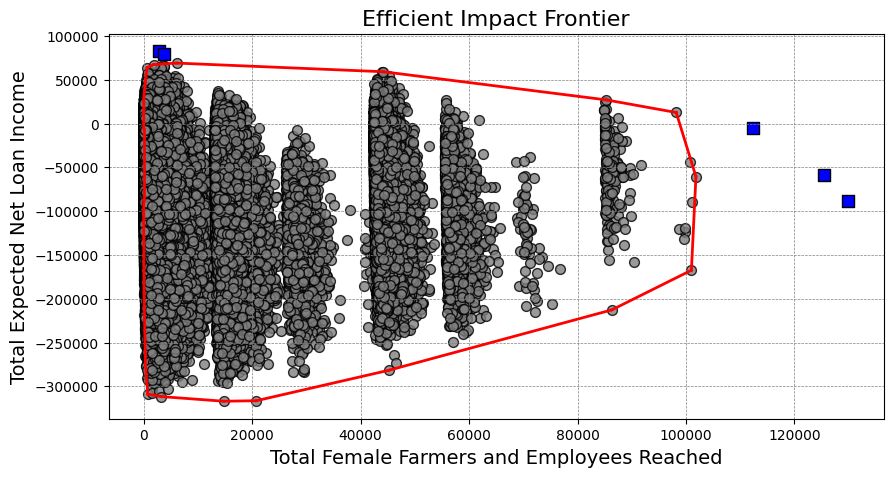

In [42]:
# Extract data
x = portfolio_df_new["Total Female Farmers and Employees Reached"].values
y = portfolio_df_new["Total Expected Net Loan Income"].values


# Stack points into an array for Convex Hull computation
points = np.column_stack((x, y))

# Compute Convex Hull
hull = ConvexHull(points)

# Plot original scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.8, edgecolor='k', color='grey', s=50, label="Portfolios")

# Plot the various strategies
plt.scatter(
    df_results["Total Female Farmers and Employees Reached"],
    df_results["Total Expected Net Loan Income"],
    c='blue',
    edgecolor='k',
    marker='s',
    s=80
)

# Plot Convex Hull (efficient frontier)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-', lw=2, label="Efficient Frontier")

# Labels and title
plt.xlabel("Total Female Farmers and Employees Reached", fontsize=14)
plt.ylabel("Total Expected Net Loan Income", fontsize=14)
plt.title("Efficient Impact Frontier", fontsize=16)

# Grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show plot
plt.show()
